# Bee algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import time

In [2]:
class Function:
    def __init__(self, size):
        self.size = size
        self.coeffs = [(np.random.rand() - 0.5) * 2 for _ in range(size)]
        self.biases = [(np.random.rand() - 0.5) * 2 for _ in range(size)]
        # self.biases = [0] * size
        # a free coefficient
        self.coeffs.append((np.random.rand() - 0.5) * 2)
    def __call__(self, *X):
        assert len(X) == self.size
        Y = sum(c * (x - b) ** 2 for i, (c, x, b) in enumerate(zip(self.coeffs, X, self.biases))) + self.coeffs[-1]
        return Y

In [3]:
f = Function(2)

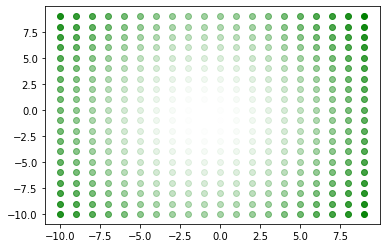

In [4]:
# ???
X = np.arange(-10, 10)
Y = np.arange(-10, 10)
Z = [[f(x, y) for y in Y] for x in X]
max_z = np.max(Z)
max_dist = max_z - np.min(Z)
for i in range(len(X)):
    for j in range(len(Y)):
        plt.plot([X[i]], [Y[j]], color = 'green', alpha = 1. - ((max_z - Z[i][j]) / max_dist), marker='o')
plt.show()

In [5]:
def generate_population(size, loc, scale):
    population = []
    for _ in range(size):
        x = loc[0] + (np.random.rand() - 0.5) * 2 * scale
        y = loc[1] + (np.random.rand() - 0.5) * 2 * scale
        population.append([x, y])
    return population

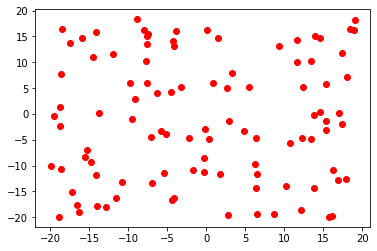

In [21]:
population = np.array(generate_population(100, loc=(0, 0), scale=20))

# plot population
plt.plot(population[:, 0], population[:, 1], marker='o', linestyle=' ', color='red')
plt.show()

In [16]:
def move(population, max_range=(-1, 1)):
    for i, position in enumerate(population):
        shift_x, shift_y = (max_range[1] - max_range[0])* np.random.random_sample((2,)) + max_range[0]
        new_position = [position[0] + shift_x, position[1] + shift_y]
        old_scale = f(*position)
        new_scale = f(*new_position)
        # if we look for min the use this:
        if new_scale < old_scale:
        #if new_scale > old_scale:
            # print('{:.3f} -> {:.3f} (shift: {:.2f}, {:.2f})'.format(old_scale, new_scale, shift_x, shift_y))
            population[i][0] = new_position[0]
            population[i][1] = new_position[1]
    return population

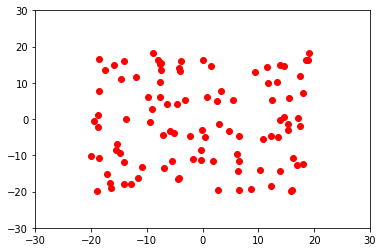

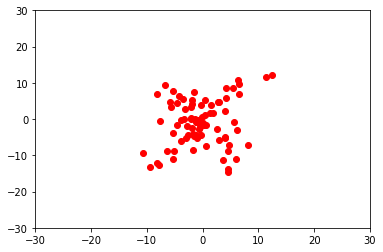

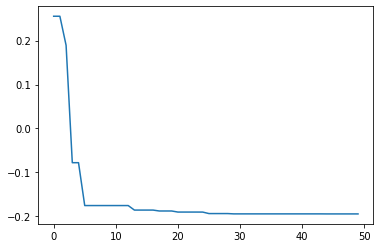

In [22]:
plt.plot(population[:, 0], population[:, 1], marker='o', linestyle=' ', color='red')
plt.xlim(left=-30, right=30)
plt.ylim(bottom=-30, top=30)
plt.show()

mins = []
for i in range(50):
    move(population)
    Z = [f(x, y) for x, y in population]
    mins.append(min(Z))
    
plt.plot(population[:, 0], population[:, 1], marker='o', linestyle=' ', color='red')
plt.xlim(left=-30, right=30)
plt.ylim(bottom=-30, top=30)
plt.show()

plt.plot(mins)
plt.show()

In [14]:
Z = [f(x, y) for x, y in population]
print(np.ptp(Z))

5.214727952444146


TODO: add velocity of bee and class bee as well